# Data exporation 

in this section we will be exploring the data and preprocessing it for the model.



## imports

In [18]:
import pandas as pd
import helper
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


## Raw data

In [19]:
data = pd.read_csv('../input/dataset.csv', index_col=0)
#data.head()



In [20]:
data.describe()

,vote_count,vote_average,duration,revenue,popularity,id,financial_investment
count,4803.000000,4323.000000,4801.000000,4.755000e+03,4803.000000,4803.000000,4.419000e+03
mean,690.217989,6.090354,106.875859,8.231486e+07,21.492301,57165.484281,2.898466e+07
std,1234.585891,1.193315,22.611935,1.630872e+08,31.816650,88694.614033,4.065526e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,5.000000,0.000000e+00
25%,54.000000,5.600000,94.000000,0.000000e+00,4.668070,9014.500000,7.500000e+05
50%,235.000000,6.200000,103.000000,1.918402e+07,12.921594,14629.000000,1.480000e+07
75%,737.000000,6.800000,118.000000,9.311911e+07,28.313505,58610.500000,4.000000e+07
max,13752.000000,10.000000,338.000000,2.787965e+09,875.581305,459488.000000,3.800000e+08


## drop non relevent columns / entries

In [21]:
data.columns

Index(['vote_count', 'vote_average', 'title', 'tagline', 'status',
       'spoken_languages', 'duration', 'revenue', 'release',
       'countries_of_production', 'production', 'popularity', 'overview',
       'original_title', 'original_language', 'keywords', 'id', 'homepage',
       'genres', 'financial_investment'],
      dtype='object')

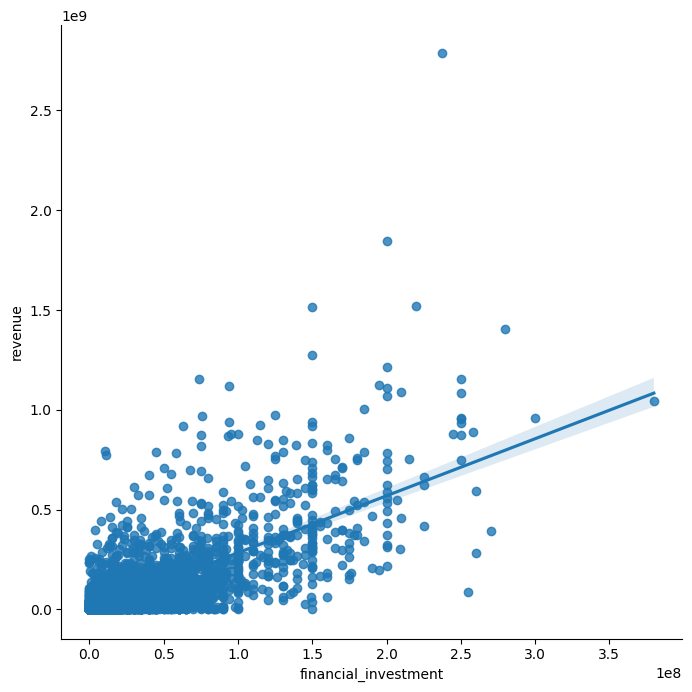

In [22]:
sns.pairplot(data, x_vars=['financial_investment'],y_vars='revenue', height=7, aspect=1, kind='reg')
columns_to_drop = ['duration','id']
data.drop(columns=columns_to_drop, inplace=True)


In [23]:
drop_list = ["title", "tagline", "production","overview","original_title","homepage"]


data = data.dropna(subset=['revenue'])
data = data[data['revenue'] != 0]
data = data.drop(drop_list, axis=1)
data.head()

,vote_count,vote_average,status,spoken_languages,revenue,release,countries_of_production,popularity,original_language,keywords,genres,financial_investment
0,11800,7.2,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",2.787965e+09,2009-12-10,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",150.437577,en,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000.0
1,4500,6.9,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",9.610000e+08,2007-05-19,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",139.082615,en,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000.0
2,4466,6.3,Released,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",8.806746e+08,2015-10-26,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",107.376788,en,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000.0
3,9106,7.6,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1.084939e+09,2012-07-16,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",112.312950,en,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000.0
4,2124,6.1,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2.841391e+08,2012-03-07,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",43.926995,en,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000.0


## extracting json data




In [24]:
data["spoken_languages"] = data["spoken_languages"].apply(helper.extract_iso_values_to_string, key="iso_639_1")
data["countries_of_production"] = data["countries_of_production"].apply(helper.extract_iso_values_to_string, key="iso_3166_1")
data["keywords"] = data["keywords"].apply(helper.extract_iso_values_to_string, key="name")
data["genres"] = data["genres"].apply(helper.extract_iso_values_to_string, key="name")

data.head()



,vote_count,vote_average,status,spoken_languages,revenue,release,countries_of_production,popularity,original_language,keywords,genres,financial_investment
0,11800,7.2,Released,"en,es",2.787965e+09,2009-12-10,"US,GB",150.437577,en,"culture clash,future,space war,space colony,so...","Action,Adventure,Fantasy,Science Fiction",237000000.0
1,4500,6.9,Released,en,9.610000e+08,2007-05-19,US,139.082615,en,"ocean,drug abuse,exotic island,east india trad...","Adventure,Fantasy,Action",300000000.0
2,4466,6.3,Released,"fr,en,es,it,de",8.806746e+08,2015-10-26,"GB,US",107.376788,en,"spy,based on novel,secret agent,sequel,mi6,bri...","Action,Adventure,Crime",245000000.0
3,9106,7.6,Released,en,1.084939e+09,2012-07-16,US,112.312950,en,"dc comics,crime fighter,terrorist,secret ident...","Action,Crime,Drama,Thriller",250000000.0
4,2124,6.1,Released,en,2.841391e+08,2012-03-07,US,43.926995,en,"based on novel,mars,medallion,space travel,pri...","Action,Adventure,Science Fiction",260000000.0


## converting realease date

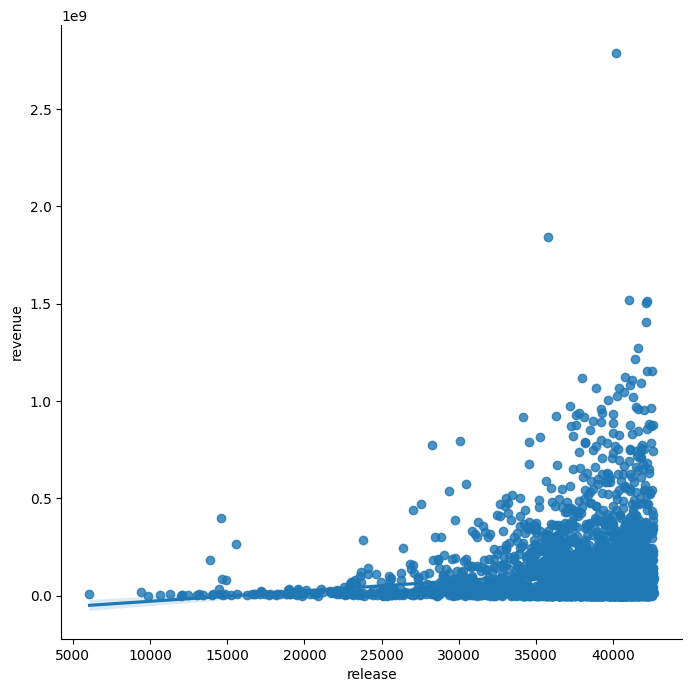

In [25]:
data["release"] = data["release"].apply(helper.convert_datestring_to_days_since_1900)
sns.pairplot(data, x_vars=['release'],y_vars='revenue', height=7, aspect=1, kind='reg')



## missing entries

In [26]:
# missing entries

missing_entries = data.isnull().sum()
print(missing_entries)


vote_count                   0
vote_average               347
status                       0
spoken_languages             0
revenue                      0
release                      0
countries_of_production      0
popularity                   0
original_language          169
keywords                     0
genres                       0
financial_investment       272
dtype: int64


## extended imputation

removed missing entries for "original_language" because of exit code (2) with the simple imputer

In [27]:

data = data.dropna(subset=["original_language"])
data = helper.extended_imputation(data, verbose=True)



Columns with missing data: ['vote_average', 'financial_investment']
Dropped column 'vote_average' due to an error during imputation.
"None of [Index(['vote_average'], dtype='object')] are in the [index]"
Dropped column 'financial_investment' due to an error during imputation.
"None of [Index(['financial_investment'], dtype='object')] are in the [index]"


## one hot encoding

### results with list one hot encoding: 

- Number of columns in the one-hot encoded data for spoken_languages: 87
- Number of columns in the one-hot encoded data for countries_of_production: 88
- Number of columns in the one-hot encoded data for production: 5017
- Number of columns in the one-hot encoded data for keywords: 9813
- Number of columns in the one-hot encoded data for genres: 20

#### the only usable list is for genres, we will use the list one hot encoding for the rest
### results with list one hot encoding only first in list: 

- Number of columns in the one-hot encoded data for spoken_languages: 56
- Number of columns in the one-hot encoded data for countries_of_production: 70
- Number of columns in the one-hot encoded data for production: 1316
- Number of columns in the one-hot encoded data for keywords: 1351
- Number of columns in the one-hot encoded data for genres: 20

### we will ordinal encode all columns apart from genre and status



In [28]:
import helper

ohe_data = helper.one_hot_encode_column(data, 'status')
ohe_data = helper.one_hot_encode_column(data, 'genres')
ohe_data = ohe_data.drop(columns=['status', 'genres'], axis=1)
ohe_data.head()



,vote_count,vote_average,spoken_languages,revenue,release,countries_of_production,popularity,original_language,keywords,financial_investment,...,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,11800.0,7.2,"en,es",2.787965e+09,40155.0,"US,GB",150.437577,en,"culture clash,future,space war,space colony,so...",237000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4500.0,6.9,en,9.610000e+08,39219.0,US,139.082615,en,"ocean,drug abuse,exotic island,east india trad...",300000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4466.0,6.3,"fr,en,es,it,de",8.806746e+08,42301.0,"GB,US",107.376788,en,"spy,based on novel,secret agent,sequel,mi6,bri...",245000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9106.0,7.6,en,1.084939e+09,41104.0,US,112.312950,en,"dc comics,crime fighter,terrorist,secret ident...",250000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2124.0,6.1,en,2.841391e+08,40973.0,US,43.926995,en,"based on novel,mars,medallion,space travel,pri...",260000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## ordinal encoding




In [29]:
oe_data = helper.ordinal_encode_column(ohe_data, 'spoken_languages')
oe_data = helper.ordinal_encode_column(ohe_data, 'original_language')

oe_data = helper.ordinal_encode_column(oe_data, 'countries_of_production')
oe_data = helper.ordinal_encode_column(oe_data, 'keywords')

drop_list = ["spoken_languages","countries_of_production","keywords","original_language"]
data = oe_data.drop(drop_list,axis=1)
data.head()


,vote_count,vote_average,revenue,release,popularity,financial_investment,Action,Adventure,Animation,Comedy,...,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,original_language_encoded,countries_of_production_encoded,keywords_encoded
0,11800.0,7.2,2.787965e+09,40155.0,150.437577,237000000.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,182.0,121.0
1,4500.0,6.9,9.610000e+08,39219.0,139.082615,300000000.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,219.0,312.0
2,4466.0,6.3,8.806746e+08,42301.0,107.376788,245000000.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,182.0,1253.0
3,9106.0,7.6,1.084939e+09,41104.0,112.312950,250000000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,219.0,1349.0
4,2124.0,6.1,2.841391e+08,40973.0,43.926995,260000000.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,219.0,87.0


In [30]:
data.columns
genre_columns = ['Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western']
not_genre_columns = [col for col in data.columns if col not in genre_columns]
data_genre = data.drop(columns= not_genre_columns)
data_genre.mean()

Action             0.268879
Adventure          0.199466
Animation          0.059497
Comedy             0.343631
Crime              0.156751
Documentary        0.014493
Drama              0.454996
Family             0.121663
Fantasy            0.110603
Foreign            0.001907
History            0.041953
Horror             0.099542
Music              0.036613
Mystery            0.080473
Romance            0.181541
Science Fiction    0.126240
Thriller           0.275362
War                0.033944
Western            0.020214
dtype: float64

# Mutual Information 

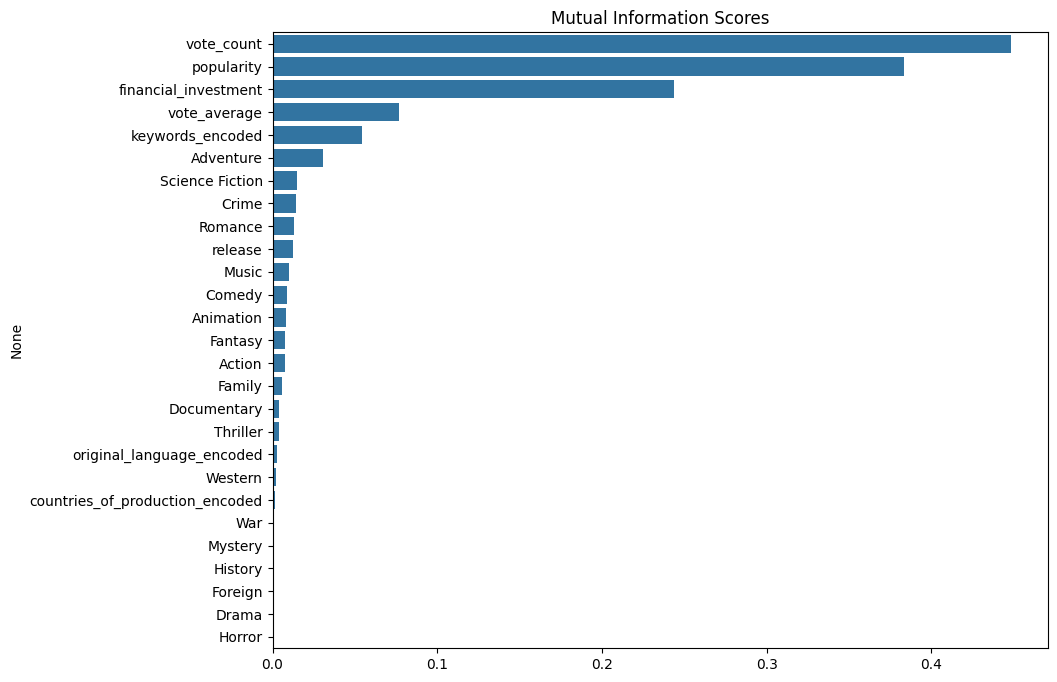

In [31]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
data = data.dropna()
mi_data =data.dropna()
le = LabelEncoder()
mi_data['revenue'] = le.fit_transform(mi_data['revenue'])

X = mi_data.drop('revenue', axis=1)
y = mi_data['revenue']

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)



plt.figure(figsize=(10, 8))
sns.barplot(x=mi_scores.values, y=mi_scores.index)
plt.title('Mutual Information Scores')
plt.show()


# Benchmark

In [32]:
data.head()


,vote_count,vote_average,revenue,release,popularity,financial_investment,Action,Adventure,Animation,Comedy,...,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,original_language_encoded,countries_of_production_encoded,keywords_encoded
0,11800.0,7.2,2.787965e+09,40155.0,150.437577,237000000.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,182.0,121.0
1,4500.0,6.9,9.610000e+08,39219.0,139.082615,300000000.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,219.0,312.0
2,4466.0,6.3,8.806746e+08,42301.0,107.376788,245000000.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,182.0,1253.0
3,9106.0,7.6,1.084939e+09,41104.0,112.312950,250000000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,219.0,1349.0
4,2124.0,6.1,2.841391e+08,40973.0,43.926995,260000000.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,219.0,87.0


In [33]:
data = data.drop(columns =[ 'keywords_encoded'])
data.to_csv('../input/preprocessed_data.csv')


In [34]:
helper.test_data_set(data, pca_components = 24, verbose=True)

RMSE for 30 estimators: 124774353.56429125
ratio of y_test to predictions:
count    3.500000e+02
mean     9.889463e-01
std      8.099510e-01
min      1.530820e-07
25%      4.595517e-01
50%      7.816700e-01
75%      1.351932e+00
max      7.439565e+00
Name: revenue, dtype: float64


124774353.56429125

# Plots 

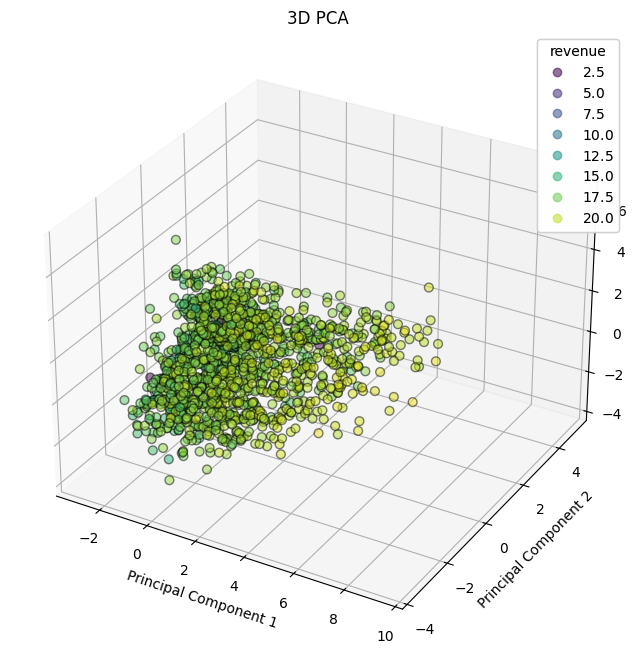

In [35]:
helper.plot_pca_3d(data, 'revenue')

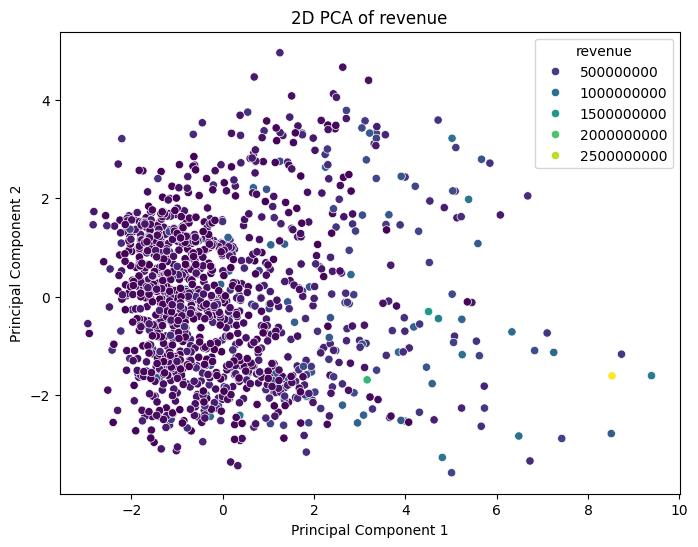

In [36]:
helper.plot_pca_2d(data, 'revenue')

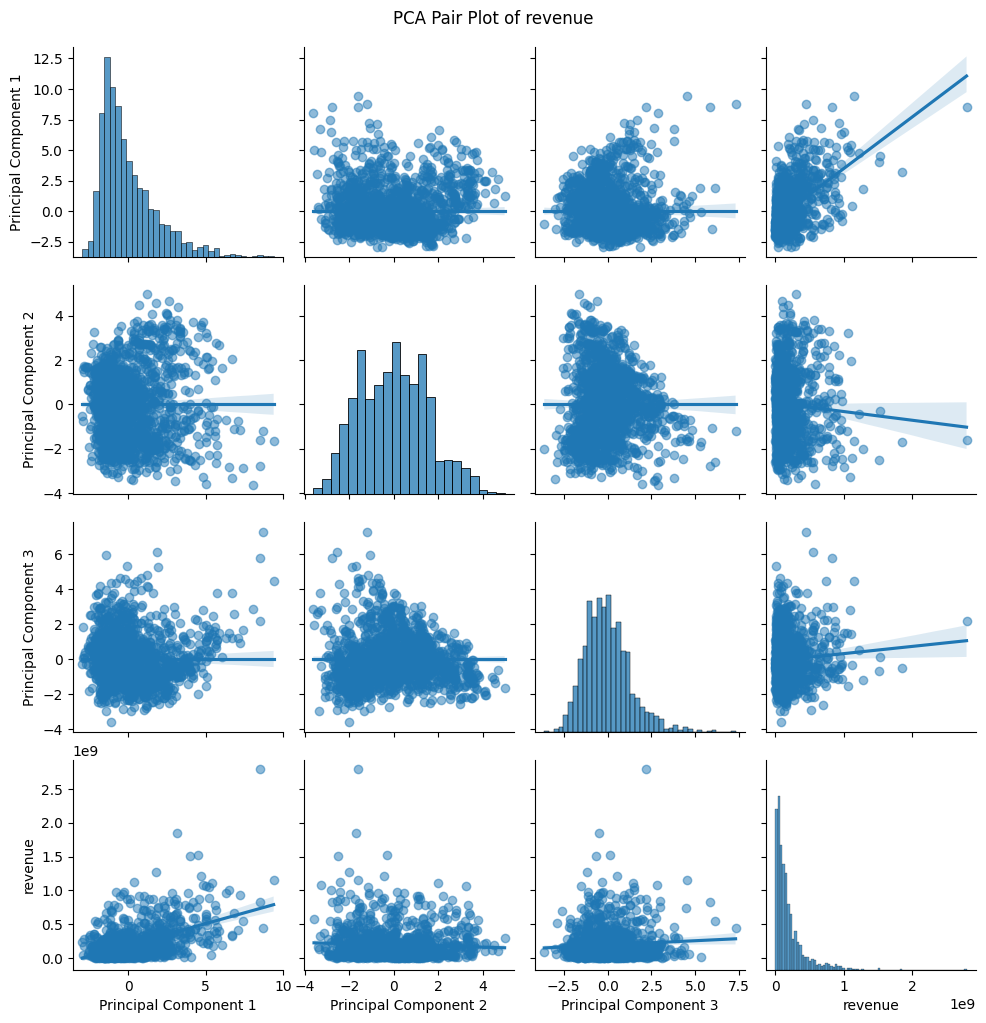

In [37]:
helper.plot_pca_pairplot(data, 'revenue')

Best RMSE: 124774353.56 for 24 PCA components


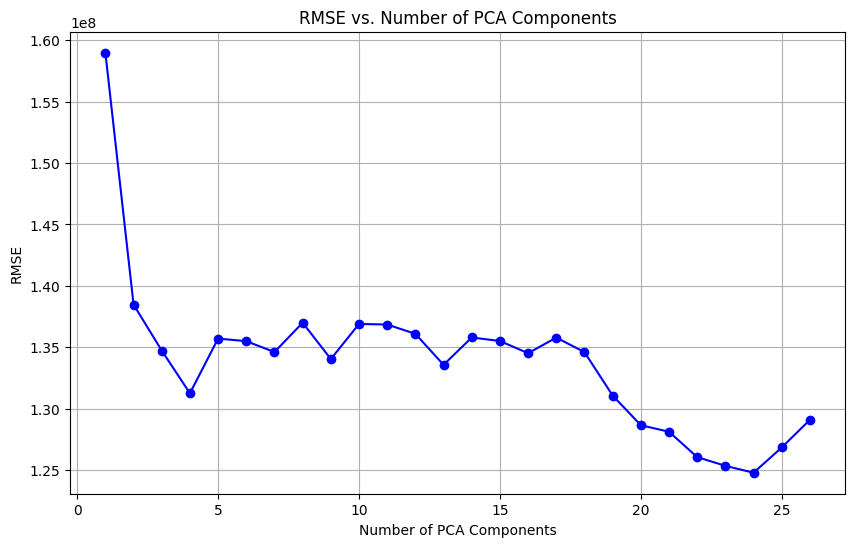

In [38]:
helper.plot_mse_pca(data)
